### Scaling graph plot 

- Authors : Angelica , Kshitij

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [7]:
def plot_scaling_analysis(results_dir, out='plot_scaling_analysis.png'):
    data = [json.load(open(f)) for f in Path(results_dir).glob("*.json")]
    df = pd.DataFrame(data)
    df['total_time_min'] = df['total_time_sec'] / 60

    executor_memory = df['executor_memory'].iloc[0]
    executor_cores = df['executor_cores'].iloc[0]

    speedup_list = []
    for fraction in df['sample_fraction'].unique():
        subset = df[df['sample_fraction'] == fraction]
        min_executors = subset['num_executors'].min()
        t_min = subset[subset['num_executors'] == min_executors]['total_time_min'].iloc[0]
        speedup_list.extend([{
            'sample_fraction': fraction,
            'num_executors': row['num_executors'],
            'speedup': t_min / row['total_time_min']
        } for _, row in subset.iterrows()])

    df_speedup = pd.DataFrame(speedup_list)

    fig, ax = plt.subplots(figsize=(10, 6))
    for fraction in sorted(df_speedup['sample_fraction'].unique()):
        subset = df_speedup[df_speedup['sample_fraction'] == fraction].sort_values('num_executors')
        ax.plot(subset['num_executors'], subset['speedup'], 
                marker='o', linewidth=2, markersize=8, label=f'{fraction*100:.0f}% data')
        
        for _, row in subset.iterrows():
            ax.annotate(f'{int(row["num_executors"])}', 
                       xy=(row['num_executors'], row['speedup']),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, alpha=0.7)

    ax.set_xlabel('Number of Executors', fontsize=12)
    ax.set_ylabel('Speed-up T(min)/T(n)', fontsize=12)
    ax.set_title(f'Speed-up Curve for Cluster Scaling\n({executor_memory}GB Memory, {executor_cores} Cores per Executor)', 
                 fontsize=14, weight='bold')
    ax.legend(title='Data Fraction', fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(out, dpi=300)
    plt.show()
    return None

def plot_training_time_vs_executors(results_dir,out='plot_training_time_vs_executors.png'):
    json_files = list(Path(results_dir).glob("*.json"))

    data = []
    for file in json_files:
        with open(file) as f:
            data.append(json.load(f))

    df = pd.DataFrame(data)
    df['training_time_min'] = df['training_time_sec'] / 60

    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    executor_memory = df['executor_memory'].iloc[0]
    executor_cores = df['executor_cores'].iloc[0]

    for fraction in sorted(df['sample_fraction'].unique()):
        subset = df[df['sample_fraction'] == fraction].sort_values('num_executors', ascending=False)
        ax.plot(subset['num_executors'], subset['training_time_min'], 
                marker='o', linewidth=2, markersize=8, 
                label=f'{fraction*100:.0f}% data')

    ax.set_xlabel('Number of Executors', fontsize=12)
    ax.set_ylabel('Training Time (minutes)', fontsize=12)
    ax.set_title(f'Training time for Cluster Scaling\n({executor_memory}GB Memory, {executor_cores} Cores per Executor)', 
                    fontsize=14, weight='bold')
    ax.legend(title='Data Fraction', fontsize=10)
    ax.grid(True, alpha=0.3)
    # ax.invert_xaxis()
    plt.tight_layout()
    plt.savefig(out, dpi=300)
    plt.show()
    return None


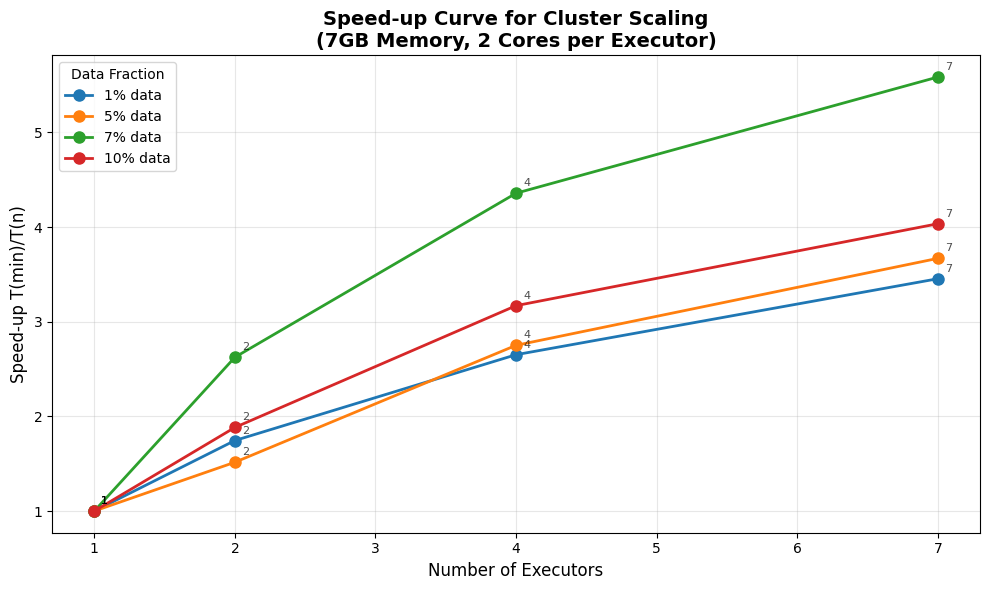

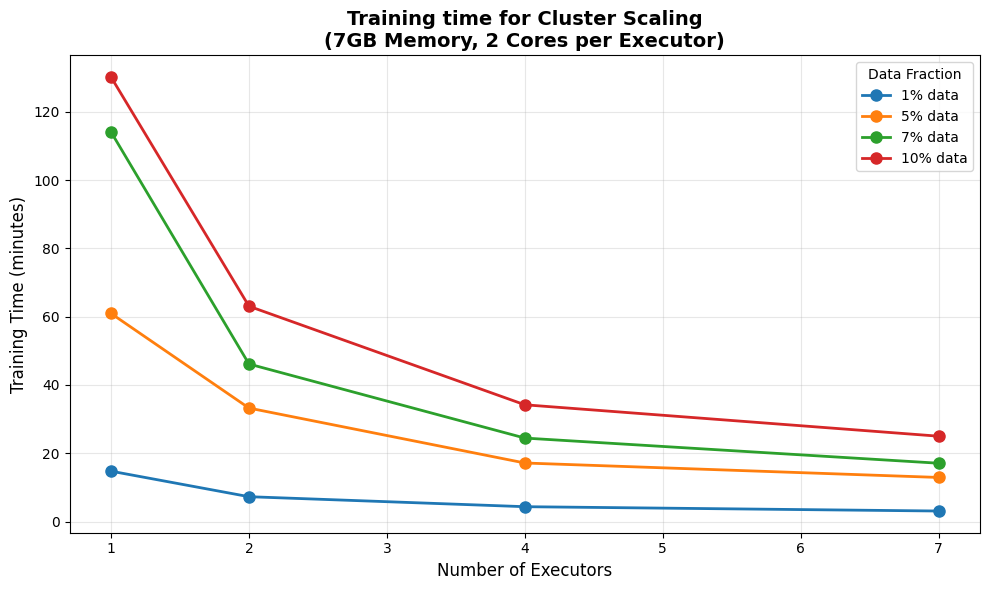

In [8]:
results_dir_local = Path("../results/local/experiment-1-fixed-tree/")
plot_scaling_analysis(results_dir_local, out='graphs/scaling_analysis_local.png')
plot_training_time_vs_executors(results_dir_local, out='graphs/training_time_vs_executors_local.png')

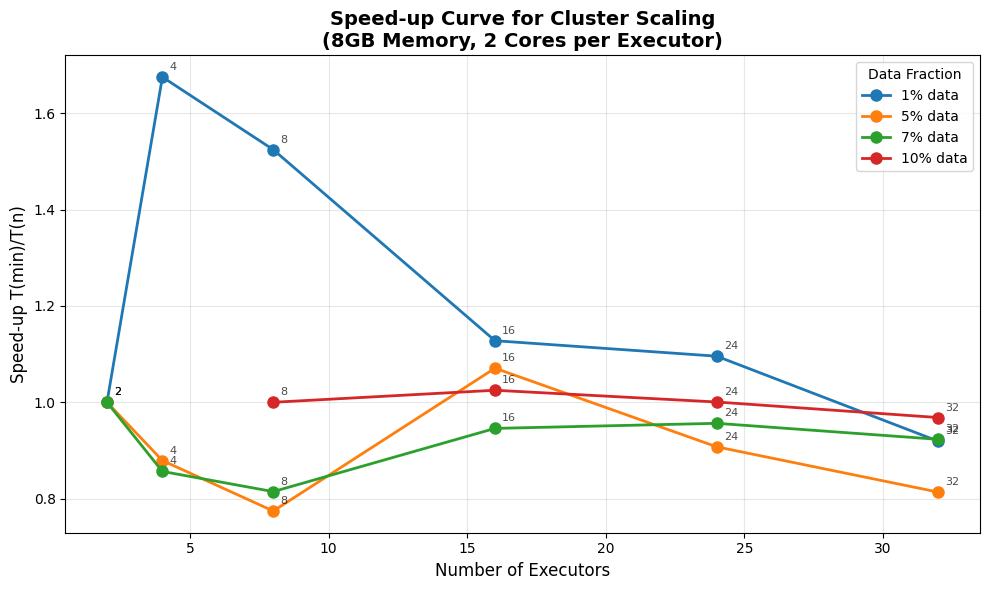

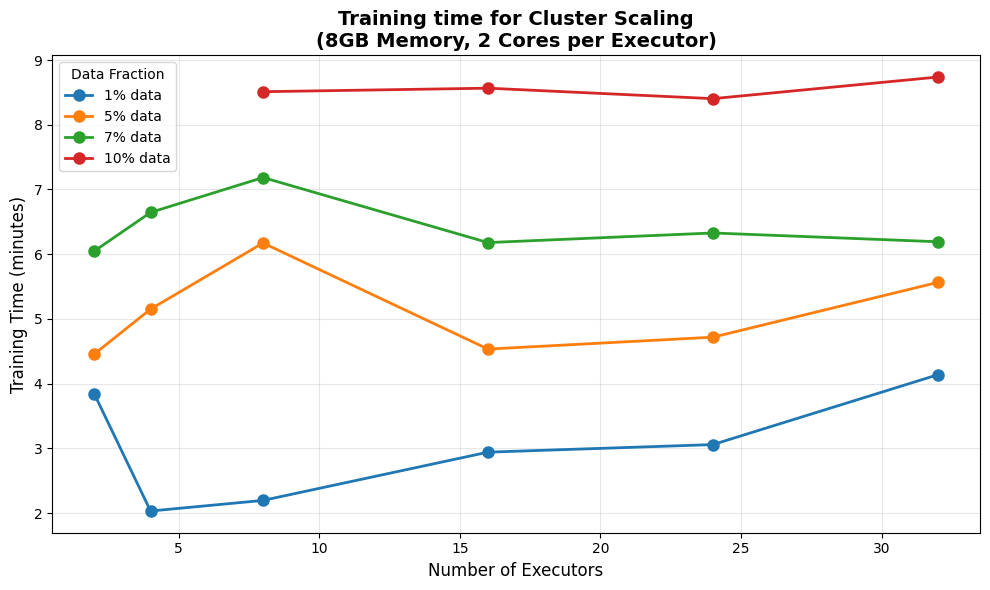

In [11]:
results_dir_server = Path("../results/server/")
plot_scaling_analysis(results_dir_server, out='graphs/scaling_analysis_server.png')
plot_training_time_vs_executors(results_dir_server, out='graphs/training_time_vs_executors_server.png')